# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data and take a look on them

In [2]:
data = pd.read_csv('real_estate_price_size_year_view.csv')

In [3]:
data.shape

(100, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
 2   year    100 non-null    int64  
 3   view    100 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [5]:
data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [6]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


# Create dummies for 'view'

In [7]:
data_prepared = data.copy()
data_prepared['view'] = data_prepared['view'].map({'Sea view': 1, 'No sea view': 0})

In [8]:
data_prepared.head(10)

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
5,245050.280,575.19,2006,1
6,265129.064,570.89,2015,1
7,175716.480,620.82,2006,0
8,331101.344,682.26,2018,1
9,218630.608,694.52,2009,0


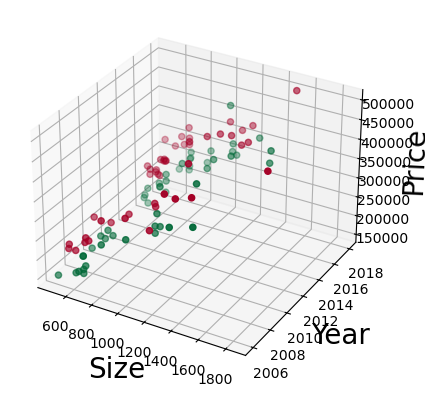

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_prepared['size'], data_prepared['year'], data_prepared['price'], c=data_prepared['view'], cmap='RdYlGn_r')
ax.set_xlabel('Size', fontsize = 20)
ax.set_ylabel('Year', fontsize = 20)
ax.set_zlabel('Price', fontsize = 20)
plt.show()

# Regression

In [11]:
y = data_prepared['price']
x1 = data_prepared[['size', 'year', 'view']]

In [12]:
# Add constant
X = sm.add_constant(x1)
# Fit the model
results = sm.OLS(y, X).fit()
# Print summary of the regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           1.02e-50
Time:                        15:16:04   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Check predictions

In [17]:
predictions = results.predict(X)
predictions

0     224197.233189
1     210811.945021
2     254331.773344
3     416374.658398
4     405648.064843
          ...      
95    243802.939878
96    295836.058985
97    391904.118401
98    225356.997610
99    270325.279719
Length: 100, dtype: float64

In [24]:
comparasion = data_prepared.copy()
comparasion['predictions'] = predictions
comparasion['error'] = comparasion['predictions'] - comparasion['price']
comparasion

,price,size,year,view,predictions,error
0,234314.144,643.09,2015,0,224197.233189,-10116.910811
1,228581.528,656.22,2009,0,210811.945021,-17769.582979
2,281626.336,487.29,2018,1,254331.773344,-27294.562656
3,401255.608,1504.75,2015,0,416374.658398,15119.050398
4,458674.256,1275.46,2009,1,405648.064843,-53026.191157
...,...,...,...,...,...,...
95,252460.400,549.80,2009,1,243802.939878,-8657.460122
96,310522.592,1037.44,2009,0,295836.058985,-14686.533015
97,383635.568,1504.75,2006,0,391904.118401,8268.550401
98,225145.248,648.29,2015,0,225356.997610,211.749610
